# Define o Modelo

In [6]:
import pandas as pd # para ler os dados em tabela
import numpy as np # para álgebra linear
from sklearn import linear_model, model_selection, datasets # para comparar o nosso algoritmo com o de mercado
import matplotlib.pyplot as plt # para fazer gráficos
from matplotlib import style
from time import time # para ver quanto tempo demora
style.use('ggplot') # para gráficos bonitinhos
np.random.seed(1) # para resultados consistentes 

class ridge_regression(object):

    def __init__(self, l = 1e-4):
        self.l = l

    def fit(self, X_train, y_train):
        # adiciona coluna de 1 nos dados
        X = np.insert(X_train, 0, 1, 1)

        # estima os w_hat
        I = np.identity(X.shape[1]) * self.l
        w_hat = np.dot( np.dot( np.linalg.inv(np.dot(X.T, X) + I), X.T), y_train)
                                    # (X^T * X + l * I)^-1 * X^T * y
        self.w_hat = w_hat
        self.coef = self.w_hat[1:]
        self.intercept = self.w_hat[0]

    def predict(self, X_test):
        X = np.insert(X_test, 0, 1, 1) # adiciona coluna de 1 nos dados
        y_pred = np.dot(X, self.w_hat) # X * w_hat = y_hat
        return y_pred

# Verifica o Efeito de Variar a Regularização

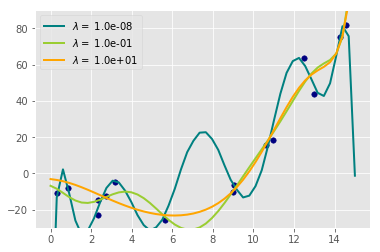

In [203]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
import numpy as np
np.random.seed(42)

def f(x):
    return x**2 - 10*x + 5 + np.random.normal(0,10,size=x.shape)

# Gera os dados e usa um subset para treino
x = np.linspace(0, 15, 100)
x_train = np.random.uniform(0,15,15)
x_test = np.random.uniform(0,15,20)
y = f(x_train)
X = x_train[:, np.newaxis]

# parâmetros do gráfico
colors = ['teal', 'yellowgreen', 'orange']
lw = 2

# ajusta polinômios de graus 2, 4 e 10.
for count, l in enumerate([1e-8, 1e-1, 10]):
    
    # crias as variáveis polinomiais e as passa pelo modelo de regressão linear
    model = make_pipeline(PolynomialFeatures(10), ridge_regression(l=l))
    model.fit(x_train.reshape(-1,1), y)
    
    # coloca as previsões no gráfico
    x_plot = np.linspace(0,15, 50)
    y_plot = model.predict(x_plot.reshape(-1,1))
    plt.plot(x_plot.reshape(-1,1), y_plot, color=colors[count], linewidth=lw,
             label="$\lambda =$ %.1e" % l)

plt.scatter(x_train, y, color='navy', s=30, marker='o')
plt.ylim([-30,90])
plt.legend(loc='best')

plt.show()